In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
data =  pd.read_csv('C:/Personal/09239740/Documents/FAST/mvh_hh_all_store1.csv')


In [59]:
data.head()

,id,cv_city_name,cv_zipcode_5,hh_size_num,hh_size,hoh_age_num,hoh_age,hoh_lifestage_num,hoh_lifestage,hoh_ethnicity,hh_income_num,hh_income,hh_presence_of_child,hh_presence_of_gender,hh_urban_suburban_rural,retailer,city,county,state,store_zip_5
0,1,GREENVILLE,29601,1,Person,1,Millennial (Age 19-39),1,Getting Started,Asian,5,$50K-$70K,No,Female,Urban,ALL OTHER C&G,GREENVILLE,GREENVILLE,SC,29607
1,2,GREENVILLE,29601,1,Person,1,Millennial (Age 19-39),1,Getting Started,Asian,5,$50K-$70K,No,Female,Urban,ALL OTHER C&G,GREENVILLE,GREENVILLE,SC,29609
2,3,GREENVILLE,29601,1,Person,1,Millennial (Age 19-39),1,Getting Started,Asian,5,$50K-$70K,No,Female,Urban,ALL OTHER C&G,MILL SPRINGS,POLK,NC,28756
3,4,GREENVILLE,29601,1,Person,1,Millennial (Age 19-39),1,Getting Started,Asian,5,$50K-$70K,No,Female,Urban,ALL OTHER C&G,GREENVILLE,GREENVILLE,SC,29605
4,5,SOUTHAVEN,38671,1,Person,2,Gen X (Age 40-50),2,Younger Families,African American,2,$15K-$25K,No,Female,Urban,FAMILY DOLLAR,SOUTHAVEN,DESOTO,MS,38671


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26007 entries, 0 to 26006
Data columns (total 20 columns):
id                         26007 non-null int64
cv_city_name               26007 non-null object
cv_zipcode_5               26007 non-null int64
hh_size_num                26007 non-null int64
hh_size                    26007 non-null object
hoh_age_num                26007 non-null int64
hoh_age                    26007 non-null object
hoh_lifestage_num          26007 non-null int64
hoh_lifestage              26007 non-null object
hoh_ethnicity              26007 non-null object
hh_income_num              26007 non-null int64
hh_income                  26007 non-null object
hh_presence_of_child       26007 non-null object
hh_presence_of_gender      26007 non-null object
hh_urban_suburban_rural    26007 non-null object
retailer                   26007 non-null object
city                       26006 non-null object
county                     26006 non-null object
state          

In [61]:
data[data.isnull().any(axis=1)]

,id,cv_city_name,cv_zipcode_5,hh_size_num,hh_size,hoh_age_num,hoh_age,hoh_lifestage_num,hoh_lifestage,hoh_ethnicity,hh_income_num,hh_income,hh_presence_of_child,hh_presence_of_gender,hh_urban_suburban_rural,retailer,city,county,state,store_zip_5
22320,22321,PHILADELPHIA,19114,1,Person,1,Millennial (Age 19-39),1,Getting Started,African American,4,$35K-$50K,No,Female,Urban,ALL OTHER AO,NaN,PHILADELPHIA,PHILADELPHIA,PA
24126,24127,GLENDALE,85308,1,Person,1,Millennial (Age 19-39),6,known,Caucasian,1,lt $15K,No,Female,Urban,ALL OTHER AO,GLENDALE,NaN,MARICOPA,AZ


In [62]:
#data.drop(354,axis=0,inplace = True)

In [64]:
data.describe(include = 'all')

,id,cv_city_name,cv_zipcode_5,hh_size_num,hh_size,hoh_age_num,hoh_age,hoh_lifestage_num,hoh_lifestage,hoh_ethnicity,hh_income_num,hh_income,hh_presence_of_child,hh_presence_of_gender,hh_urban_suburban_rural,retailer,city,county,state,store_zip_5
count,26007.000000,26007,26007.000000,26007.000000,26007,26007.000000,26007,26007.000000,26007,26007,26007.000000,26007,26007,26007,26007,26007,26006,26006,26007,26007
unique,NaN,2464,NaN,NaN,3,NaN,6,NaN,6,5,NaN,7,2,4,3,33,4254,1311,118,7807
top,NaN,NEW YORK,NaN,NaN,Person,NaN,Millennial (Age 19-39),NaN,Getting Started,Caucasian,NaN,$70K-$100K,No,Female,Urban,ALL OTHER AO,NEW YORK,MARICOPA,TX,80601
freq,NaN,444,NaN,NaN,20373,NaN,16333,NaN,10385,16031,NaN,5285,23784,11540,22940,12295,328,602,2014,66
mean,13004.000000,NaN,47722.344907,1.330757,NaN,1.830392,NaN,3.023878,NaN,NaN,4.691968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7507.718562,NaN,27491.365329,0.853690,NaN,1.332208,NaN,2.057713,NaN,NaN,1.814362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1001.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6502.500000,NaN,25303.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,13004.000000,NaN,45405.000000,1.000000,NaN,1.000000,NaN,2.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19505.500000,NaN,74443.000000,1.000000,NaN,2.000000,NaN,5.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data['hh_urban_suburban_rural'].value_counts()

Urban       22940
Suburban     2324
Rural         743
Name: hh_urban_suburban_rural, dtype: int64

In [66]:
data.columns

Index(['id ', 'cv_city_name', 'cv_zipcode_5', 'hh_size_num', 'hh_size',
       'hoh_age_num', 'hoh_age', 'hoh_lifestage_num', 'hoh_lifestage',
       'hoh_ethnicity', 'hh_income_num', 'hh_income', 'hh_presence_of_child',
       'hh_presence_of_gender', 'hh_urban_suburban_rural', 'retailer', 'city',
       'county', 'state', 'store_zip_5'],
      dtype='object')

In [83]:
contin_vars = ['hh_size_num', 'hoh_age_num','hoh_lifestage_num',]
cat_vars =['hoh_ethnicity','hh_presence_of_child','hh_presence_of_gender', 'hh_urban_suburban_rural']

In [84]:
#cat_vars=['hh_presence_of_gender', 'hh_urban_suburban_rural','hoh_ethnicity']
#contin_vars=[ 'tsales','Value','200000 or more', '25000 -50000','Intercept']

In [85]:
df = data.copy()

In [86]:
#le = LabelEncoder()
#df[cat_vars] = df[cat_vars].apply(le.fit_transform)

In [87]:
df.tail()

,id,cv_city_name,cv_zipcode_5,hh_size_num,hh_size,hoh_age_num,hoh_age,hoh_lifestage_num,hoh_lifestage,hoh_ethnicity,hh_income_num,hh_income,hh_presence_of_child,hh_presence_of_gender,hh_urban_suburban_rural,retailer,city,county,state,store_zip_5
26002,26003,NORTH OLMSTED,44070,1,Person,4,Older Boomer (61-70),4,Established Workers,Caucasian,6,$70K-$100K,No,Female,Urban,ALL OTHER C&G,CLEVELAND,CUYAHOGA,OH,44135
26003,26004,NORTH OLMSTED,44070,1,Person,4,Older Boomer (61-70),4,Established Workers,Caucasian,6,$70K-$100K,No,Female,Urban,ALL OTHER C&G,NORTH OLMSTED,CUYAHOGA,OH,44070
26004,26005,SAN JOSE,95125,1,Person,6,Seniors (Age 81+),5,Retired,Caucasian,6,$70K-$100K,No,Female,Urban,ALL OTHER DRUG,SAN JOSE,SANTA CLARA,CA,95125
26005,26006,YOUNGSTOWN,44515,1,Person,2,Gen X (Age 40-50),1,Getting Started,African American,1,lt $15K,No,Unknown,Urban,ALL OTHER MASS,AUSTINTOWN,MAHONING,OH,44515
26006,26007,LEANDER,78641,5,Persons,2,Gen X (Age 40-50),2,Younger Families,Asian,6,$70K-$100K,Yes,Female,Urban,CIRCLE K,LEANDER,WILLIAMSON,TX,78641


In [88]:
"""from sklearn import preprocessing

x = df[contin_vars].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[contin_vars])
df[contin_vars] = pd.DataFrame(x_scaled)"""

'from sklearn import preprocessing\n\nx = df[contin_vars].values #returns a numpy array\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(df[contin_vars])\ndf[contin_vars] = pd.DataFrame(x_scaled)'

In [89]:
le = LabelEncoder()
df[cat_vars] = df[cat_vars].apply(le.fit_transform)

In [90]:
df.tail()

,id,cv_city_name,cv_zipcode_5,hh_size_num,hh_size,hoh_age_num,hoh_age,hoh_lifestage_num,hoh_lifestage,hoh_ethnicity,hh_income_num,hh_income,hh_presence_of_child,hh_presence_of_gender,hh_urban_suburban_rural,retailer,city,county,state,store_zip_5
26002,26003,NORTH OLMSTED,44070,1,Person,4,Older Boomer (61-70),4,Established Workers,2,6,$70K-$100K,0,1,2,ALL OTHER C&G,CLEVELAND,CUYAHOGA,OH,44135
26003,26004,NORTH OLMSTED,44070,1,Person,4,Older Boomer (61-70),4,Established Workers,2,6,$70K-$100K,0,1,2,ALL OTHER C&G,NORTH OLMSTED,CUYAHOGA,OH,44070
26004,26005,SAN JOSE,95125,1,Person,6,Seniors (Age 81+),5,Retired,2,6,$70K-$100K,0,1,2,ALL OTHER DRUG,SAN JOSE,SANTA CLARA,CA,95125
26005,26006,YOUNGSTOWN,44515,1,Person,2,Gen X (Age 40-50),1,Getting Started,0,1,lt $15K,0,3,2,ALL OTHER MASS,AUSTINTOWN,MAHONING,OH,44515
26006,26007,LEANDER,78641,5,Persons,2,Gen X (Age 40-50),2,Younger Families,1,6,$70K-$100K,1,1,2,CIRCLE K,LEANDER,WILLIAMSON,TX,78641


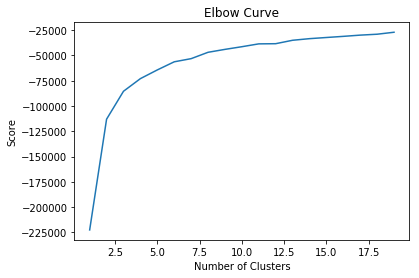

In [91]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(df[contin_vars+cat_vars]).score(df[contin_vars+cat_vars]) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

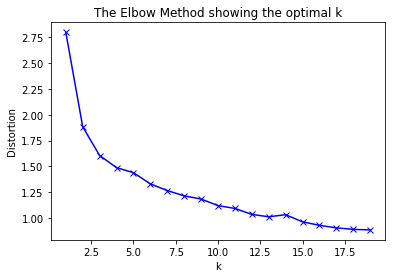

In [92]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df[contin_vars+cat_vars])
    kmeanModel.fit(df[contin_vars+cat_vars])
    distortions.append(sum(np.min(cdist(df[contin_vars+cat_vars], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df[contin_vars+cat_vars].shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df[contin_vars+cat_vars])

In [94]:
data['cluster']=kmeans.predict(df[contin_vars+cat_vars])

In [44]:
data['cluster'].value_counts()

4    7967
1    5896
2    3800
3    2882
5    2705
6    2174
0     583
Name: cluster, dtype: int64

In [43]:
data[data['cluster']==2]

,Store,tsales,tunits,City,State,Zip,divisiondesc,storebanner,storeid,1 -25000,100000 - 200000,200000 or more,25000 -50000,50000- 75000,75000 -100000,Value,Intercept,No_of Items,Urban_Rural,cluster
4,240395,170676.98,71586,"New Albany, IN",IN,47150,Kroger,Louisville,734,9160,2170,420,6370,3160,1900,-0.356727,29451.6,135,Urban,2
25,240744,276110.31,112242,"New Albany, IN",IN,47150,Kroger,Louisville,771,9160,2170,420,6370,3160,1900,2.724580,-93301.9,169,Urban,2
57,240741,351690.82,134699,"MADISON, IN",IN,47250,Kroger,Louisville,769,4020,980,210,2550,1420,930,-3.641800,184774.0,137,Rural,2
115,240396,468334.01,192333,"New Albany, IN",IN,47150,Kroger,Louisville,735,9160,2170,420,6370,3160,1900,-21.703700,965550.0,172,Urban,2
126,7080787,493945.07,215951,"Hammond, IN",IN,46320,Food 4 Less,Food 4 Less - Midwest,2511,2950,100,0,1410,400,200,52.409600,-2196180.0,146,Urban,2
133,240762,512057.89,211328,"Clarksville, IN",IN,47129,Kroger,Louisville,779,4110,450,60,3040,1170,600,-11.069000,515204.0,179,Urban,2


In [44]:
data.head()

,Store,tsales,tunits,City,State,Zip,divisiondesc,storebanner,storeid,1 -25000,100000 - 200000,200000 or more,25000 -50000,50000- 75000,75000 -100000,Value,Intercept,No_of Items,Urban_Rural,cluster
0,140301,100120.35,54879,"Cincinnati, OH",OH,45202,Kroger,Cincinnati/Dayton,190,2380,1210,900,1900,1320,840,-3.377070,152509.0,117,Urban,1
1,210001,136326.58,53736,"INDIANAPOLIS, IN",IN,46202,Kroger,Central,560,3130,910,500,2290,1270,640,-4.080850,185570.0,164,Urban,0
2,210016,140377.19,55810,"INDIANAPOLIS, IN",IN,46222,Kroger,Central,561,8180,200,20,4590,1110,290,-5.223790,234699.0,129,Urban,0
3,140351,169454.79,68435,"Montgomery, OH",OH,45242,Kroger,Cincinnati/Dayton,195,3090,2310,1680,1860,1500,1140,-2.875740,136885.0,185,Urban,1
4,240395,170676.98,71586,"New Albany, IN",IN,47150,Kroger,Louisville,734,9160,2170,420,6370,3160,1900,-0.356727,29451.6,135,Urban,2


(array([ 583., 5896.,    0., 3800.,    0., 2882., 7967.,    0., 2705.,
        2174.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

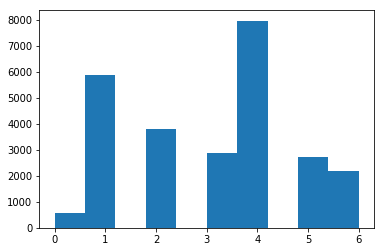

In [45]:
plt.hist(data['cluster'])

(array([  5.,  20., 103.,  58.,  13.,   4.,   1.,   0.,   0.,   1.]),
 array([-28.6378 , -20.53306, -12.42832,  -4.32358,   3.78116,  11.8859 ,
         19.99064,  28.09538,  36.20012,  44.30486,  52.4096 ]),
 <a list of 10 Patch objects>)

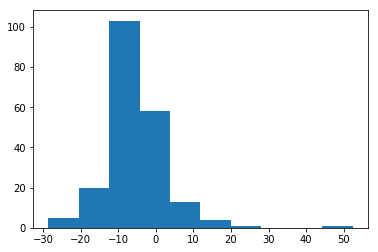

In [46]:
plt.hist(data['Value'])

In [46]:
data.to_excel('mvh_clus1.xlsx')